# Project Code

The project Colab notebook should be submitted at the end of the project. To prepare the notebook, consider the following instruction:

1. Code in the notebook cells and generate proper outputs with explanatory descriptions (e.g. `print('the RMSE for testing the model on the train dataset:', train_RMSE)`).
2. Use comments (using #) for each cell to explain the code.
3. All the models covered in this course should be trained and tested on both train and test datasets.


> *   For regression problems, Linear Reg, Polynomial Reg (with different degrees), ElasticNet (in case of overfitting problem), SVM (Linear and Poly), Decision Trees, and Random Forest.

> *   For Classification problems, SGDClassifier, SVM, Decision Trees, and Random Forest.


> *   For regression problems, calculate RMSEs for all the trained models (evaluate models on both train and test datasets). <br>
IMPORTANT Note: there should be no overfitting issue in any of the models.

> *   For Classification problems, calculate confusion matrix, precision, recall, and f1 score for all the trained models (evaluate models on both train and test datasets. <br>
IMPORTANT Note: there should be no overfitting issue in any of the models.















In [ ]:
!pip install ucimlrepo
#installs the uc irvine repo to grab data
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# metadata
print(phishing_websites.keys)

# variable information
print(phishing_websites.variables)


#this ends the import code borrowed from UCI - the rest of the code is mine :)

<built-in method keys of dotdict object at 0x7a6d21464450>
                          name     role     type demographic description  \
0            having_ip_address  Feature  Integer        None        None   
1                   url_length  Feature  Integer        None        None   
2           shortining_service  Feature  Integer        None        None   
3             having_at_symbol  Feature  Integer        None        None   
4     double_slash_redirecting  Feature  Integer        None        None   
5                prefix_suffix  Feature  Integer        None        None   
6            having_sub_domain  Feature  Integer        None        None   
7               sslfinal_state  Feature  Integer        None        None   
8   domain_registration_length  Feature  Integer        None        None   
9                      favicon  Feature  Integer        None        None   
10                        port  Feature  Integer        None        None   
11                 https_toke

In [ ]:
#classification problem (phishing or not phishing)
import warnings
#ignoring the warning "A column-vector y was passed when a 1d array was expected" to make code more legible
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#using feature importance to see what is best to use/most influential
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X, y)
for score, name in zip(rnd_clf.feature_importances_, X.columns):
    print(round(score, 2), name)

0.01 having_ip_address
0.01 url_length
0.01 shortining_service
0.01 having_at_symbol
0.0 double_slash_redirecting
0.04 prefix_suffix
0.07 having_sub_domain
0.31 sslfinal_state
0.02 domain_registration_length
0.0 favicon
0.0 port
0.01 https_token
0.02 request_url
0.26 url_of_anchor
0.04 links_in_tags
0.02 sfh
0.01 submitting_to_email
0.0 abnormal_url
0.01 redirect
0.0 on_mouseover
0.0 rightclick
0.0 popupwindow
0.0 iframe
0.02 age_of_domain
0.01 dnsrecord
0.07 web_traffic
0.01 page_rank
0.01 google_index
0.02 links_pointing_to_page
0.0 statistical_report


Dropping any values that have a 0.0 leaving


*   having ip address
*   url length
*   shortening service
*   having @ symbol
*   prefix/suffix **
*   having subdomain **
*   ssl final value ***
*   domain registration path **
*   https token
*   request url **
*   url of anchor***
*   links in tags
*   sfh
*   submitting to email
*   redirect
*   age of domain **
*   dnsrecord
*   web traffic **
*   page rank
*   google index
*   links pointing to page **

** = less than 10 percent, but greater than 1


*** = 10 percent or greater


















Greater than 1% most likely to be used/influential than the others, leaving

prefix/suffix **

having subdomain **

ssl final value ***

domain registration path **

request url **

url of anchor***

age of domain **

web traffic **

links pointing to page **



---

.07 and greater:

having_sub_domain

 sslfinal_state

 url_of_anchor

 web_traffic



In [ ]:
#SDG Classifier - checking the right amount of values to use first before proceeding with the rest of the project
#x1 being the X>1%

X1 = X[["prefix_suffix","having_sub_domain","sslfinal_state","domain_registration_length","request_url",
       "url_of_anchor","age_of_domain", "web_traffic", "links_pointing_to_page" ]].values

#checking how good the model is after pruning varables with 1% or less weight

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X1, y)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

print("X1:",cross_val_score(sgd_clf, X1, y, cv=3, scoring="accuracy"))


X1: [0.9156038  0.91207598 0.89850746]


In [ ]:
#x2  being 10 values - added one 1% value being google index
X2 = X[["prefix_suffix","having_sub_domain","sslfinal_state","domain_registration_length","request_url",
       "url_of_anchor","age_of_domain", "web_traffic", "links_pointing_to_page","google_index" ]].values

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X2, y)
print("X2:",cross_val_score(sgd_clf, X2, y, cv=3, scoring="accuracy"))

X2: [0.91071913 0.91451832 0.8936228 ]


In [ ]:
#11 values - chose the first and last values with 1% weight, google index and ip address
X3 = X[["prefix_suffix","having_sub_domain","sslfinal_state","domain_registration_length","request_url",
       "url_of_anchor","age_of_domain", "web_traffic", "links_pointing_to_page","google_index","having_ip_address"]].values

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X3, y)
print("X3:",cross_val_score(sgd_clf, X3, y, cv=3, scoring="accuracy"))

X3: [0.91858887 0.91289009 0.91153324]


X3 with 11 values seems to be the best after incrementally adding more 1% values to X1 (12 values decreased the accuracy)

In [ ]:
from sklearn.model_selection import train_test_split
#splitting and shuffling the set
#loading data into arrays to shuffle
train_set, test_set, y_train, y_test = train_test_split(X3,y, test_size=0.2, random_state=10)
sgd_clf = SGDClassifier(random_state=42)
#fitting the training set
sgd_clf.fit(train_set, y_train)

#performance testing
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score


#confusion matrixes
y_train_pred = cross_val_predict(sgd_clf, train_set, y_train, cv=3)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix of SDGClassifer train set: \n", cm_train)

y_test_pred = cross_val_predict(sgd_clf, test_set, y_test, cv=3)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix of SDGClassifer test set: \n", cm_test)

#precision scores
print("SDGClassifier train set precision score: ",precision_score(y_train, y_train_pred))
print("SDGClassifier test set precision score: ",precision_score(y_test, y_test_pred))

#recall scores
print("SDGClassifier train set recall score: ",recall_score(y_train, y_train_pred))
print("SDGClassifier test set recall score: ",recall_score(y_test, y_test_pred))

#f1 scores
print("SDGClassifier train set F1 score: ", f1_score(y_train, y_train_pred))
print("SDGClassifier test set F1 score: ", f1_score(y_test, y_test_pred))

Confusion matrix of SDGClassifer train set: 
 [[3502  435]
 [ 354 4553]]
Confusion matrix of SDGClassifer test set: 
 [[ 810  151]
 [  85 1165]]
SDGClassifier train set precision score:  0.9127906976744186
SDGClassifier test set precision score:  0.8852583586626139
SDGClassifier train set recall score:  0.9278581618096596
SDGClassifier test set recall score:  0.932
SDGClassifier train set F1 score:  0.9202627589691763
SDGClassifier test set F1 score:  0.9080280592361653


In [ ]:
#SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(train_set, y_train)

#performance testing

#confusion matrixes
y_train_pred = cross_val_predict(svm_clf, train_set, y_train, cv=3)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix of SVCr train set: \n", cm_train)

y_test_pred = cross_val_predict(svm_clf, test_set, y_test, cv=3)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix of SVC test set: \n", cm_test)


#precision scores
print("SVC train set precision score: ",precision_score(y_train, y_train_pred))
print("SVC test set precision score: ",precision_score(y_test, y_test_pred))

#recall scores
print("SVC train set recall score: ",recall_score(y_train, y_train_pred))
print("SVC test set recall score: ",recall_score(y_test, y_test_pred))

#f1 scores
print("SVC train set F1 score: ", f1_score(y_train, y_train_pred))
print("SVC test set F1 score: ", f1_score(y_test, y_test_pred))

Confusion matrix of SVCr train set: 
 [[3472  465]
 [ 283 4624]]
Confusion matrix of SVC test set: 
 [[ 844  117]
 [  83 1167]]
SVC train set precision score:  0.9086264492041658
SVC test set precision score:  0.9088785046728972
SVC train set recall score:  0.9423272875484002
SVC test set recall score:  0.9336
SVC train set F1 score:  0.9251700680272108
SVC test set F1 score:  0.9210734017363852


Confusion matrix of DeciscionTree train set: 
 [[3502  435]
 [ 354 4553]]
Confusion matrix of DeciscionTree test set: 
 [[ 810  151]
 [  85 1165]]
DeciscionTree train set precision score:  0.9254305977710233
DeciscionTree test set precision score:  0.9132492113564669
DeciscionTree train set recall score:  0.9307112288567353
DeciscionTree test set recall score:  0.9264
DeciscionTree train set F1 score:  0.9280634017476123
DeciscionTree test set F1 score:  0.9197776012708498


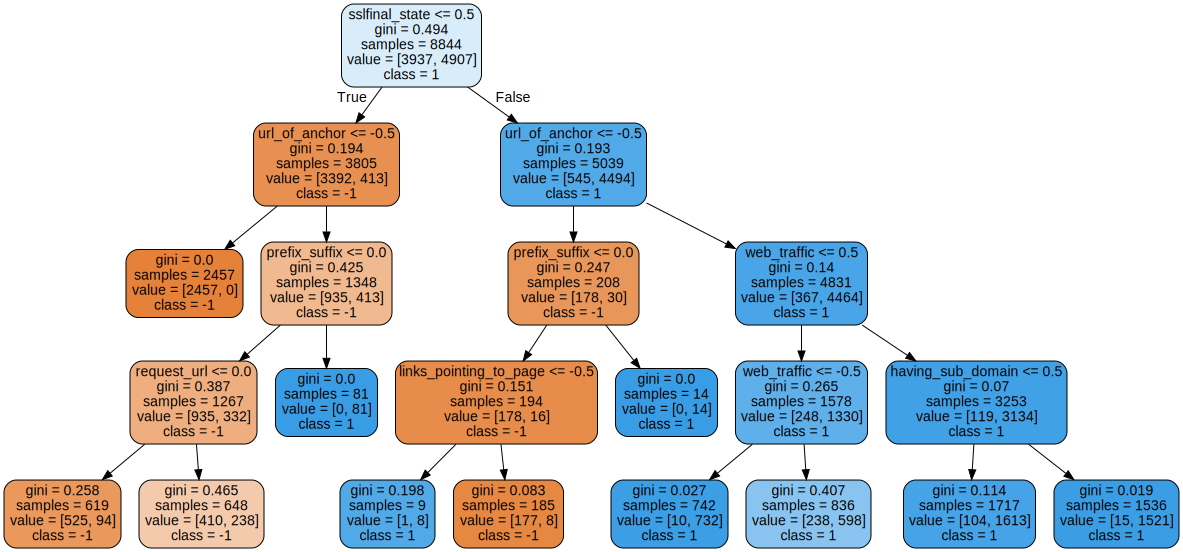

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
#4 to limit overfitting
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(train_set, y_train)

#performance testing

#confusion matrixes
y_train_pred_dt = cross_val_predict(tree_clf, train_set, y_train, cv=3)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix of DeciscionTree train set: \n", cm_train)

y_test_pred_dt = cross_val_predict(tree_clf, test_set, y_test, cv=3)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix of DeciscionTree test set: \n", cm_test)

#precision scores
print("DeciscionTree train set precision score: ",precision_score(y_train, y_train_pred_dt))
print("DeciscionTree test set precision score: ",precision_score(y_test, y_test_pred_dt))

#recall scores
print("DeciscionTree train set recall score: ",recall_score(y_train, y_train_pred_dt))
print("DeciscionTree test set recall score: ",recall_score(y_test, y_test_pred_dt))

#f1 scores
print("DeciscionTree train set F1 score: ", f1_score(y_train, y_train_pred_dt))
print("DeciscionTree test set F1 score: ", f1_score(y_test, y_test_pred_dt))


#Graphviz
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
        tree_clf,
        out_file=str("decision_tree.dot"),
        feature_names=["prefix_suffix","having_sub_domain","sslfinal_state","domain_registration_length","request_url",
       "url_of_anchor","age_of_domain", "web_traffic", "links_pointing_to_page","google_index","having_ip_address"],
        class_names=["-1","1"],
        rounded=True,
        filled=True
    )
Source.from_file("decision_tree.dot")

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(train_set, y_train)
y_pred_rf = rnd_clf.predict(train_set)

#performance testing

#confusion matrixes
y_train_pred_rf = cross_val_predict(rnd_clf, train_set, y_train, cv=3)
cm_train = confusion_matrix(y_train, y_train_pred_rf)
print("Confusion matrix of RandomForest train set: \n", cm_train)

y_test_pred_rf = cross_val_predict(rnd_clf, test_set, y_test, cv=3)
cm_test = confusion_matrix(y_test, y_test_pred_rf)
print("Confusion matrix of RandomForest test set: \n", cm_test)

#precision scores
print("RandomForest train set precision score: ",precision_score(y_train, y_train_pred_rf))
print("RandomForest test set precision score: ",precision_score(y_test, y_test_pred_rf))

#recall scores
print("RandomForest train set recall score: ",recall_score(y_train, y_train_pred_rf))
print("RandomForest test set recall score: ",recall_score(y_test, y_test_pred_rf))

#f1 scores
print("RandomForest train set F1 score: ", f1_score(y_train, y_train_pred_rf))
print("RandomForest test set F1 score: ", f1_score(y_test, y_test_pred_rf))


Confusion matrix of RandomForest train set: 
 [[3556  381]
 [ 280 4627]]
Confusion matrix of RandomForest test set: 
 [[ 858  103]
 [  68 1182]]
RandomForest train set precision score:  0.9239217252396166
RandomForest test set precision score:  0.9198443579766536
RandomForest train set recall score:  0.9429386590584878
RandomForest test set recall score:  0.9456
RandomForest train set F1 score:  0.9333333333333333
RandomForest test set F1 score:  0.9325443786982248
